In [1]:
import pandas as pd 
import pickle5 as pickle
from tqdm import tqdm
from time import time
tqdm.pandas()
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [2]:
#Transforming outliers imputations
def median_imputation(df, field_name):
    q1 = df[field_name].quantile(0.25)
    q1 = df[field_name].quantile(0.25)
    q3 = df[field_name].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    med = np.median(df[field_name])
    for i in df[field_name]:
        if i > Upper_tail or i < Lower_tail:
            df[field_name] = df[field_name].replace(i, med)
    return df

In [4]:
### ML without opis with outliers

from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
with open("./data/data_ML2021_01_07_15_36_52.pkl", "rb") as fh:
  data = pickle.load(fh)

median_imputation(data,'cena_za_metr')
median_imputation(data,'Wielkość (m2)')
testdata = pd.get_dummies(data,columns=['Na_sprzedaż_przez', 'Rodzaj_nieruchomosci','Liczba_pokoi', 'Liczba_łazienek', 'Parking', 'dzielnica','miasto','poziom_atrakcyjnosci'])
y = testdata['cena_za_metr'].values
X = testdata.drop(['cena_za_metr','cena','mieszkanie_url', 'lokalizacja','opis','opis_clean','opis_cleanv2','opis_clean_nlp','opis_cleanv2_nlp','data dodania'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=17)
scores = cross_val_score(LinearRegression(), X_train, y_train, cv=5)
print(list(scores))
print()
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


[0.4364543261896322, 0.44673203476771206, 0.4433085604955054, 0.43384282055921797, 0.4553737104530735]

Accuracy: 0.44 (+/- 0.02)


In [4]:
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
scoring='f1_macro'

with open("./data/data_ML2021_01_07_15_36_52.pkl", "rb") as fh:
  data = pickle.load(fh)
median_imputation(data,'cena_za_metr')
median_imputation(data,'Wielkość (m2)')
testdata = pd.get_dummies(data,columns=['Na_sprzedaż_przez', 'Rodzaj_nieruchomosci','Liczba_pokoi', 'Liczba_łazienek', 'Parking', 'dzielnica','miasto','poziom_atrakcyjnosci'])
y = testdata['cena_za_metr'].values
X = testdata.drop(['cena_za_metr','cena','mieszkanie_url', 'lokalizacja','opis','opis_clean','opis_cleanv2','opis_clean_nlp','opis_cleanv2_nlp','data dodania'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=17)
scores = cross_val_score(LinearRegression(), X_train, y_train, scoring=make_scorer(mean_squared_error), cv=5)
print(list(scores))
print()
print("Mean square error: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[3555631.7581710457, 3594786.8792736945, 3648859.629304842, 3790972.2953676092, 3516623.601419095]

Mean square error: 3621374.83 (+/- 190831.04)


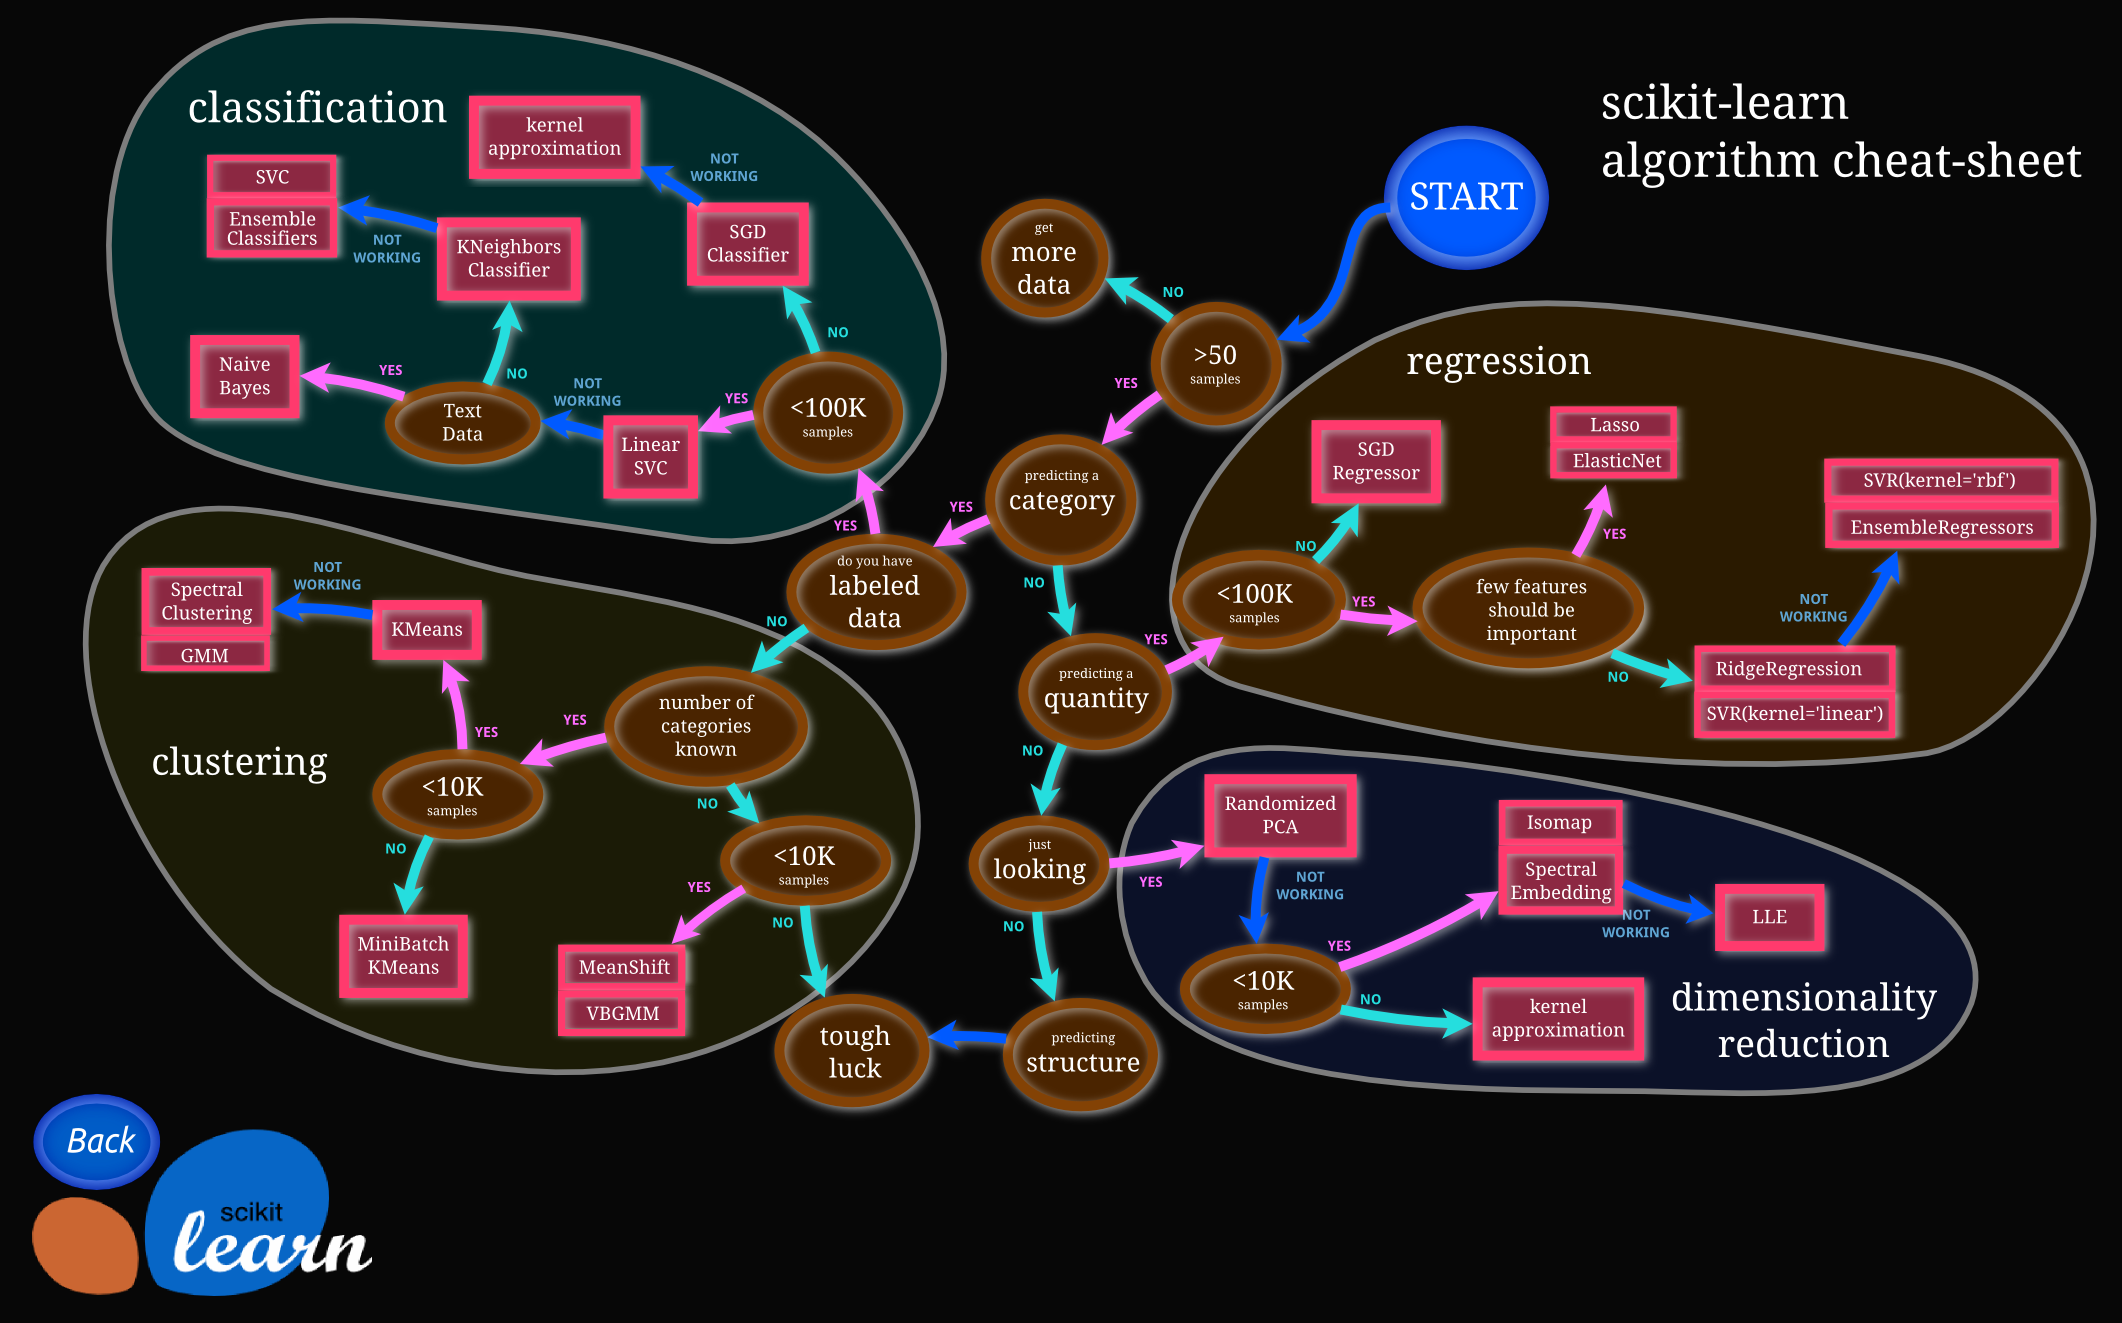

In [11]:

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]


pipeline = Pipeline([
                ('selector', ItemSelector(key='opis_cleanv2_nlp')),
                ('tfidf', TfidfVectorizer(smooth_idf=True)),
                ('best', TruncatedSVD(n_components=250)),
                ('linear', LinearRegression())
            ])

with open("./data/data_ML2021_01_07_15_36_52.pkl", "rb") as fh:
  data = pickle.load(fh)
median_imputation(data,'cena_za_metr')
median_imputation(data,'Wielkość (m2)')
testdata = pd.get_dummies(data,columns=['Na_sprzedaż_przez', 'Rodzaj_nieruchomosci','Liczba_pokoi', 'Liczba_łazienek', 'Parking', 'dzielnica','miasto','poziom_atrakcyjnosci'])
y = testdata['cena_za_metr'].values
X = testdata.drop(['cena_za_metr','cena','mieszkanie_url', 'lokalizacja','opis','opis_clean','opis_cleanv2','opis_clean_nlp','data dodania'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
scores = cross_val_score(pipeline, X_train, y_train, cv=3)
print(list(scores))
print()
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.4050211358253729, 0.3973182840594499, 0.3953668881790724]

Accuracy: 0.40 (+/- 0.01)


In [ ]:

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]


pipeline = Pipeline([
                ('selector', ItemSelector(key='opis_cleanv2_nlp')),
                ('tfidf', TfidfVectorizer()),
                ('best', TruncatedSVD(n_components=250)),
                ('linear', SVR(kernel='linear', C=1000, gamma='auto'))
            ])

with open("./data/data_ML2021_01_07_15_36_52.pkl", "rb") as fh:
  data = pickle.load(fh)
median_imputation(data,'cena_za_metr')
median_imputation(data,'Wielkość (m2)')
testdata = pd.get_dummies(data,columns=['Na_sprzedaż_przez', 'Rodzaj_nieruchomosci','Liczba_pokoi', 'Liczba_łazienek', 'Parking', 'dzielnica','miasto','poziom_atrakcyjnosci'])
y = testdata['cena_za_metr'].values
X = testdata.drop(['cena_za_metr','cena','mieszkanie_url', 'lokalizacja','opis','opis_clean','opis_cleanv2','opis_clean_nlp','data dodania'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print(list(scores))
print()
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
sklearn.svm.LinearSVR
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]


pipeline = Pipeline([
                ('selector', ItemSelector(key='opis_cleanv2_nlp')),
                ('tfidf', TfidfVectorizer()),
                ('best', TruncatedSVD(n_components=350)),
                ('linear', SVR(kernel='linear', C=1000, gamma='auto'))
            ])

with open("./data/data_ML2021_01_07_15_36_52.pkl", "rb") as fh:
  data = pickle.load(fh)
median_imputation(data,'cena_za_metr')
median_imputation(data,'Wielkość (m2)')
testdata = pd.get_dummies(data,columns=['Na_sprzedaż_przez', 'Rodzaj_nieruchomosci','Liczba_pokoi', 'Liczba_łazienek', 'Parking', 'dzielnica','miasto','poziom_atrakcyjnosci'])
y = testdata['cena_za_metr'].values
X = testdata.drop(['cena_za_metr','cena','mieszkanie_url', 'lokalizacja','opis','opis_clean','opis_cleanv2','opis_clean_nlp','data dodania'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print(list(scores))
print()
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]


pipeline = Pipeline([
                ('selector', ItemSelector(key='opis_cleanv2_nlp')),
                ('tfidf', TfidfVectorizer()),
                ('best', TruncatedSVD(n_components=350)),
                ('linear', LinearSVR(C=1000))
            ])

with open("./data/data_ML2021_01_07_15_36_52.pkl", "rb") as fh:
  data = pickle.load(fh)
median_imputation(data,'cena_za_metr')
median_imputation(data,'Wielkość (m2)')
testdata = pd.get_dummies(data,columns=['Na_sprzedaż_przez', 'Rodzaj_nieruchomosci','Liczba_pokoi', 'Liczba_łazienek', 'Parking', 'dzielnica','miasto','poziom_atrakcyjnosci'])
y = testdata['cena_za_metr'].values
X = testdata.drop(['cena_za_metr','cena','mieszkanie_url', 'lokalizacja','opis','opis_clean','opis_cleanv2','opis_clean_nlp','data dodania'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print(list(scores))
print()
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [ ]:

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from time import time
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]

parameters = parameters = {
    'best__n_components': (350,500,750,1000),
    'linear__C': (100,1000,10000)
}

pipeline = Pipeline([
                ('selector', ItemSelector(key='opis_cleanv2_nlp')),
                ('tfidf', TfidfVectorizer()),
                ('best', TruncatedSVD()),
                ('linear', LinearSVR())
            ])

grid_search = GridSearchCV(pipeline, parameters, verbose=1, cv=3)


with open("./data/data_ML2021_01_07_15_36_52.pkl", "rb") as fh:
  data = pickle.load(fh)
median_imputation(data,'cena_za_metr')
median_imputation(data,'Wielkość (m2)')
testdata = pd.get_dummies(data,columns=['Na_sprzedaż_przez', 'Rodzaj_nieruchomosci','Liczba_pokoi', 'Liczba_łazienek', 'Parking', 'dzielnica','miasto','poziom_atrakcyjnosci'])
y = testdata['cena_za_metr'].values
X = testdata.drop(['cena_za_metr','cena','mieszkanie_url', 'lokalizacja','opis','opis_clean','opis_cleanv2','opis_clean_nlp','data dodania'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=17)

t0 = time()
grid_search.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [5]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from time import time
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]

parameters = parameters = {
    'best__n_components': (750,1000),
    'svr__C': (100,1000),
    'svr__kernel':('linear', 'rbf')
}

pipeline = Pipeline([
                ('selector', ItemSelector(key='opis_cleanv2_nlp')),
                ('tfidf', TfidfVectorizer()),
                ('best', TruncatedSVD()),
                ('svr', SVR())
            ])

grid_search = GridSearchCV(pipeline, parameters, verbose=15, cv=3)


with open("./data/data_ML2021_01_07_15_36_52.pkl", "rb") as fh:
  data = pickle.load(fh)
median_imputation(data,'cena_za_metr')
median_imputation(data,'Wielkość (m2)')
testdata = pd.get_dummies(data,columns=['Na_sprzedaż_przez', 'Rodzaj_nieruchomosci','Liczba_pokoi', 'Liczba_łazienek', 'Parking', 'dzielnica','miasto','poziom_atrakcyjnosci'])
y = testdata['cena_za_metr'].values
X = testdata.drop(['cena_za_metr','cena','mieszkanie_url', 'lokalizacja','opis','opis_clean','opis_cleanv2','opis_clean_nlp','data dodania'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=17)

t0 = time()
grid_search.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3; 1/8] START best__n_components=750, svr__C=100, svr__kernel=linear......


KeyboardInterrupt: 

In [4]:

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from warnings import simplefilter
simplefilter(action='ignore', category=DeprecationWarning)
from sklearn.model_selection import GridSearchCV


param_grid = dict( scale=['passthrough', StandardScaler(), Normalizer()]
)
                  
print(param_grid)

with open("./data/data_ML2021_01_07_15_36_52.pkl", "rb") as fh:
  data = pickle.load(fh)
median_imputation(data,'cena_za_metr')
median_imputation(data,'Wielkość (m2)')
testdata = pd.get_dummies(data,columns=['Na_sprzedaż_przez', 'Rodzaj_nieruchomosci','Liczba_pokoi', 'Liczba_łazienek', 'Parking', 'dzielnica','miasto','poziom_atrakcyjnosci'])
y = testdata['cena_za_metr'].values
X = testdata.drop(['cena_za_metr','cena','mieszkanie_url', 'lokalizacja','opis','opis_clean','opis_cleanv2','opis_clean_nlp','data dodania','opis_cleanv2_nlp'], axis=1)

pipe = Pipeline([
    ('scale',  'passthrough'),
    ('regression', Ridge())
])

grid_search = GridSearchCV(pipe, param_grid, verbose=15, cv=3)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=17)

t0 = time()
grid_search.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best parameters set:")
print(grid_search.best_estimator_)
print(grid_search.best_score_)

{'scale': ['passthrough', StandardScaler(), Normalizer()]}
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3; 1/3] START scale=passthrough...........................................
[CV 1/3; 1/3] END .........................scale=passthrough; total time=   0.0s
[CV 2/3; 1/3] START scale=passthrough...........................................
[CV 2/3; 1/3] END .........................scale=passthrough; total time=   0.0s
[CV 3/3; 1/3] START scale=passthrough...........................................
[CV 3/3; 1/3] END .........................scale=passthrough; total time=   0.0s
[CV 1/3; 2/3] START scale=StandardScaler()......................................
[CV 1/3; 2/3] END ....................scale=StandardScaler(); total time=   0.0s
[CV 2/3; 2/3] START scale=StandardScaler()......................................
[CV 2/3; 2/3] END ....................scale=StandardScaler(); total time=   0.0s
[CV 3/3; 2/3] START scale=StandardScaler()..............................

In [ ]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from time import time
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import FeatureUnion

class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key=''):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]

class ItemUnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, keys=[]):
        self.keys = keys

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict.drop(self.keys, axis=1)


pipeline = Pipeline([
   ('union', 
        FeatureUnion(
            transformer_list=[
                ('table', 
                    Pipeline([
                        ('selector1', ItemUnSelector(keys=['opis_cleanv2_nlp', 'opis_clean_nlp'])),
                        ('scaler1', 'passthrough')
                    ])
                ),
                ('description', 
                    Pipeline([
                        ('selector2', ItemSelector()),
                        ('tfidf', TfidfVectorizer()),
                        ('best', TruncatedSVD()),
                        ('scaler2', 'passthrough')
                    ])
                )
            ]
        )    

   ),
   ('regressor', 
        TransformedTargetRegressor()
    )
])

parameters = parameters = {
    'union__transformer_weights': [ { 'table': 3.0, 'description': 1.0}, { 'table': 2.0, 'description': 1.0}, { 'table': 1.0, 'description': 1.0}],

    'union__description__best__n_components': (650, 700, 750),
    'union__description__tfidf__min_df': (3, 4, 5),
    'union__description__tfidf__binary': (True,False),
    'union__description__selector2__key': ['opis_cleanv2_nlp', 'opis_clean_nlp'] ,

    'union__table__scaler1': ['passthrough', StandardScaler(), Normalizer(), RobustScaler()],
    'union__description__scaler2': ['passthrough', StandardScaler(), Normalizer(), RobustScaler(with_centering=False)],

    'regressor': [SVR(kernel='rbf', C=10000), SVR(kernel='linear', C=10000), GradientBoostingRegressor()] ,
}

grid_search = GridSearchCV(pipeline, parameters, verbose=30, cv=10)


with open("./data/data_ML2021_01_07_15_36_52.pkl", "rb") as fh:
  data = pickle.load(fh)
median_imputation(data,'cena_za_metr')
median_imputation(data,'Wielkość (m2)')
testdata = pd.get_dummies(data,columns=['Na_sprzedaż_przez', 'Rodzaj_nieruchomosci','Liczba_pokoi', 'Liczba_łazienek', 'Parking', 'dzielnica','miasto','poziom_atrakcyjnosci'])
y = testdata['cena_za_metr'].values
X = testdata.drop(['cena_za_metr','cena','mieszkanie_url', 'lokalizacja','opis','opis_clean','opis_cleanv2','data dodania'], axis=1)

t0 = time()
grid_search.fit(X, y)
print("done in %0.3fs" % (time() - t0))

print("Best parameters set:")
print(grid_search.cv_results_)
print(grid_search.best_score_)
print()
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 10 folds for each of 5184 candidates, totalling 51840 fits
[CV 1/10; 1/5184] START regressor=SVR(C=10000), union__description__best__n_components=650, union__description__scaler2=passthrough, union__description__selector2__key=opis_cleanv2_nlp, union__description__tfidf__binary=True, union__description__tfidf__min_df=3, union__table__scaler1=passthrough, union__transformer_weights={'table': 3.0, 'description': 1.0}


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from time import time
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import FeatureUnion

class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key=''):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]

class ItemUnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, keys=[]):
        self.keys = keys

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict.drop(self.keys, axis=1)


pipeline = Pipeline([
   ('union', 
        FeatureUnion(
            transformer_list=[
                ('table', 
                    Pipeline([
                        ('selector1', ItemUnSelector(keys=['opis', 'opisTT', 'opisTF', 'opisFT', 'opisFF'])),
                        ('scaler1', 'passthrough')
                    ])
                ),
                ('description', 
                    Pipeline([
                        ('selector2', ItemSelector()),
                        ('tfidf', TfidfVectorizer()),
                        ('best', TruncatedSVD()),
                        ('scaler2', 'passthrough')
                    ])
                )
            ]
        )    

   ),
   ('regressor', 
        TransformedTargetRegressor()
    )
])

parameters = parameters = {
    'union__transformer_weights': [  { 'table': 1.0, 'description': 1.0}],

    'union__description__best__n_components': (700,),
    'union__description__tfidf__min_df': (3,),
    'union__description__tfidf__binary': (True,),
    'union__description__selector2__key': [ 'opisFF'] ,
    
    'union__table__scaler1': [ RobustScaler()],
    'union__description__scaler2': [ RobustScaler(with_centering=False)],
    
    'regressor': [ GradientBoostingRegressor()] ,
}

grid_search = GridSearchCV(pipeline, parameters, verbose=1, cv=10, n_jobs=-1)


y = dum_df['cena_za_metr']
X = dum_df.drop(['cena_za_metr'], axis=1)

t0 = time()
grid_search.fit(X, y)
print("done in %0.3fs" % (time() - t0))

print(f'Best score: {grid_search.best_score_}')

print("Best parameters set:")
print()
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))